PACKAGES LOADED
TOTAL 246 IMAGES LOADED.


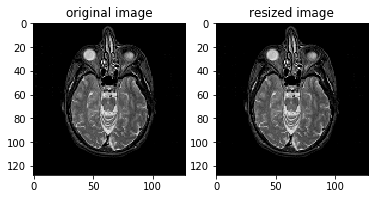

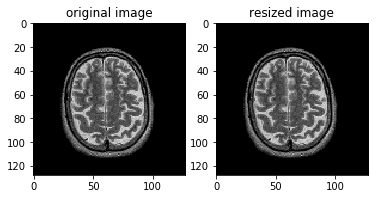

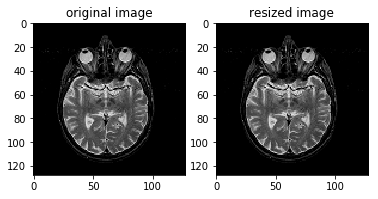

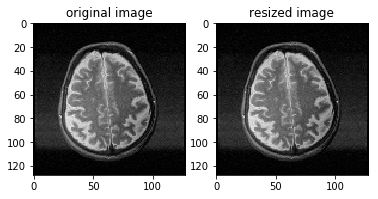

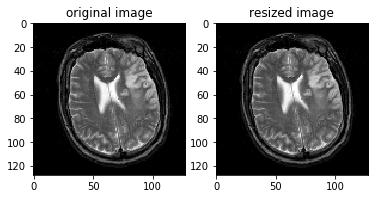

196 train and 50 test images
each image is (128,128,1)=196-dimensinoal vector
data saved to /home/kimjihee/kimjeyoung/CNN/data.npz


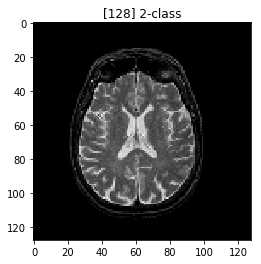

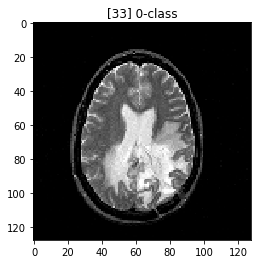

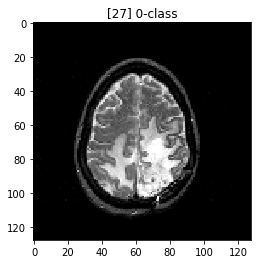

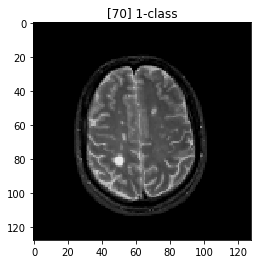

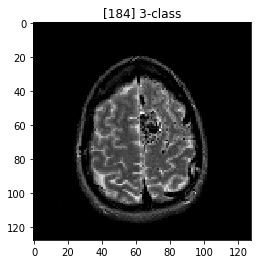

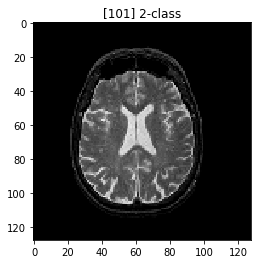

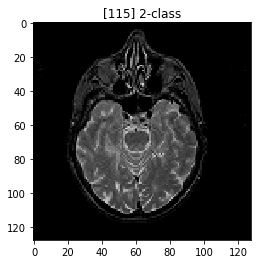

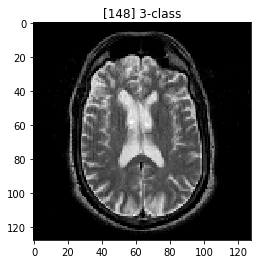

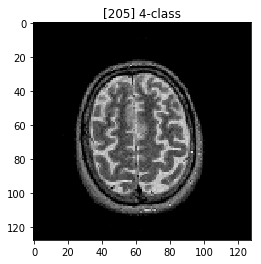

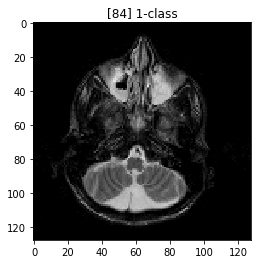

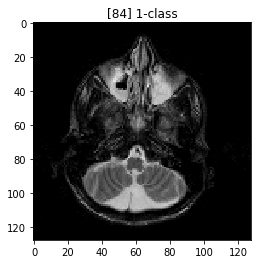

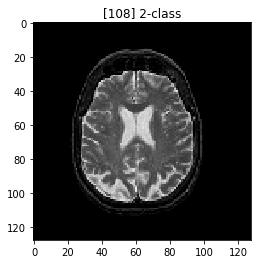

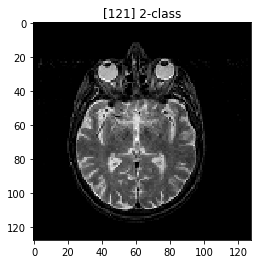

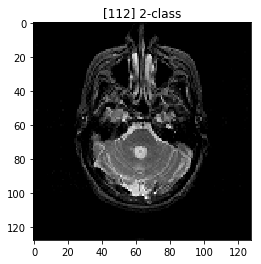

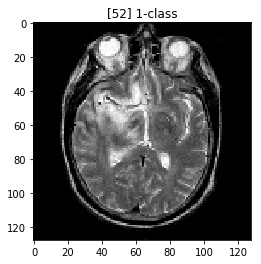

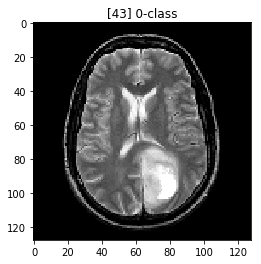

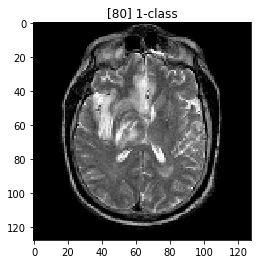

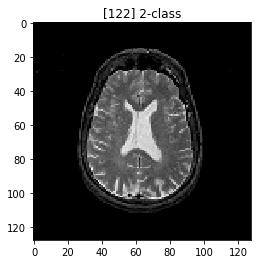

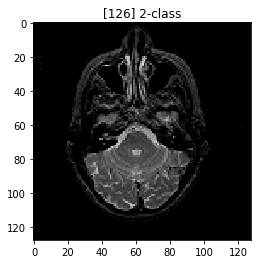

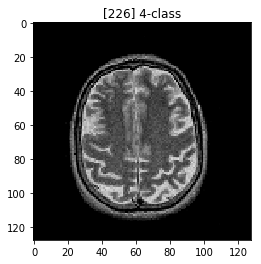

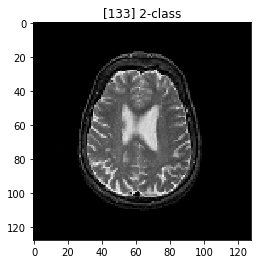

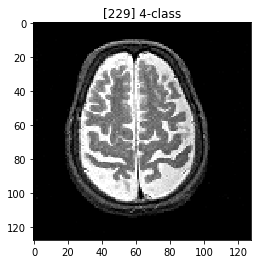

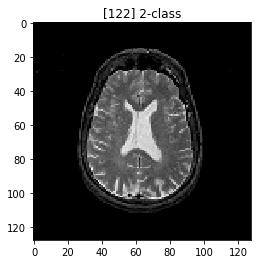

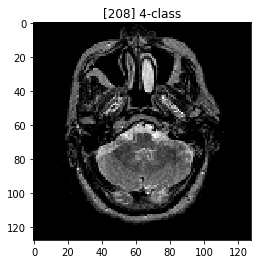

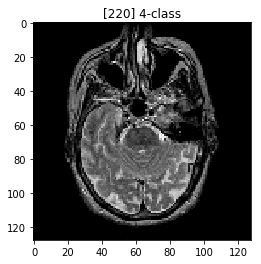

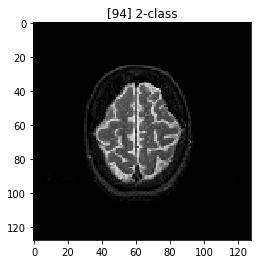

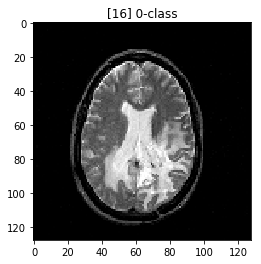

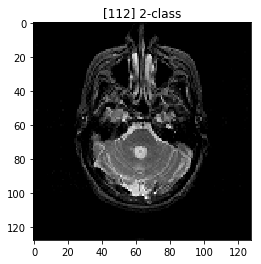

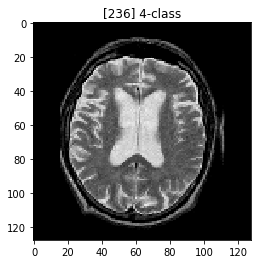

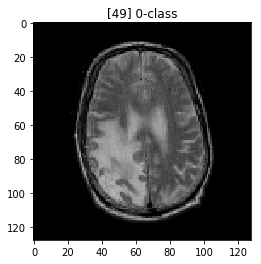

In [8]:
import os
import numpy as np
import tensorflow as tf
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
print ("PACKAGES LOADED")

cwd = os.getcwd()
paths = {cwd+'/data/cerebrovasular',
         cwd+'/data/degenerative',
         cwd+'/data/inflammatory',
         cwd+'/data/neoplastic',
         cwd+'/data/normalAging'}

imgsize = [128,128];
nclass = len(paths)
valid_exts = [".jpg",".gif",".png",".tga",".jpeg"]
imgcnt = 0
rawimg =[]
rszimg = []
for i, relpath in zip(range(nclass),paths):
    path = "/"+relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path,f)
        currimg = imread(fullpath)
        imgsmall = imresize(currimg, [128,128])
        imgvec = np.reshape(imgsmall,(1,-1))
        curr_label = np.eye(nclass,nclass)[i:i+1,:]
        if imgcnt is 0:
            totalimg = imgvec
            totallabel = curr_label
        else:
            totalimg = np.concatenate((totalimg,imgvec),axis=0)
            totallabel = np.concatenate((totallabel,curr_label),axis=0)
        rawimg.append(currimg)
        rszimg.append(imgsmall)
        imgcnt = imgcnt +1
print ("TOTAL %d IMAGES LOADED." %(imgcnt))     

for i in np.random.randint(imgcnt,size=5):
    plt.subplot(1,2,1)
    plt.imshow(rawimg[i])
    plt.title("original image")
    plt.subplot(1,2,2)
    plt.imshow(rszimg[i])
    plt.title("resized image")
    plt.show()


randidx = np.random.randint(imgcnt, size=imgcnt)
trainidx = randidx[0:int(4*imgcnt/5)]
testidx = randidx[int(4*imgcnt/5):imgcnt]
trainimg = totalimg[trainidx,:]
trainlabel = totallabel[trainidx,:]
testimg = totalimg[testidx,:]
testlabel = totallabel[testidx,:]
print("%d train and %d test images" %(len(trainidx),len(testidx)) )
print("each image is (%d,%d,1)=%d-dimensinoal vector" %(imgsize[0],imgsize[1],
                                                        trainimg.shape[0]))

savepath = cwd+"/data.npz"
np.savez(savepath,trainimg=trainimg,trainlabel=trainlabel,
        testimg=testimg,testlabel=testlabel,imgsize=imgsize)
print("data saved to %s"%(savepath))


randidx = np.random.randint(imgcnt,size =30)
for i in randidx:
    currimg = np.reshape(totalimg[i,:],(imgsize[0],-1))
    currlabel = np.argmax(totallabel[i,:])
    currimg = np.reshape(totalimg[i,:],(imgsize[0],imgsize[1],3))
    plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i,currlabel)
    plt.title(title_string)
    plt.show() 